In [1]:
import numpy as np

#1.1. Перцептроны (простейшая нейронная сеть)

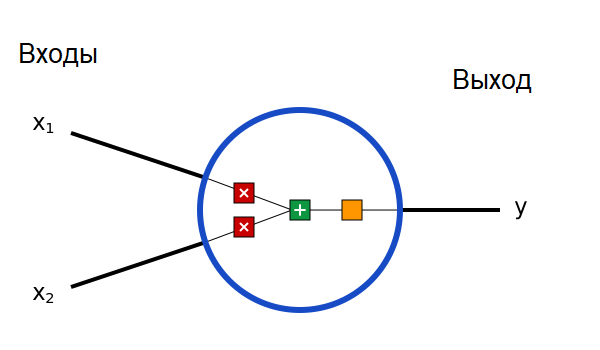

Внутри нейрона происходят три операции. Сначала значения входов умножаются на веса:

x1 -> x1 * w1; x2 -> x2 * w2

Затем взвешенные входы складываются, и к ним прибавляется значение порога b:

x1 * w1 + x2 * w2 + b

Наконец, полученная сумма проходит через функцию активации:

у = f(x1 * w1 + x2 * w2 + b)

Функция активации преобразует неограниченные значения входов в выход, имеющий ясную и предсказуемую форму. Одна из часто используемых функций активации – сигмоида:
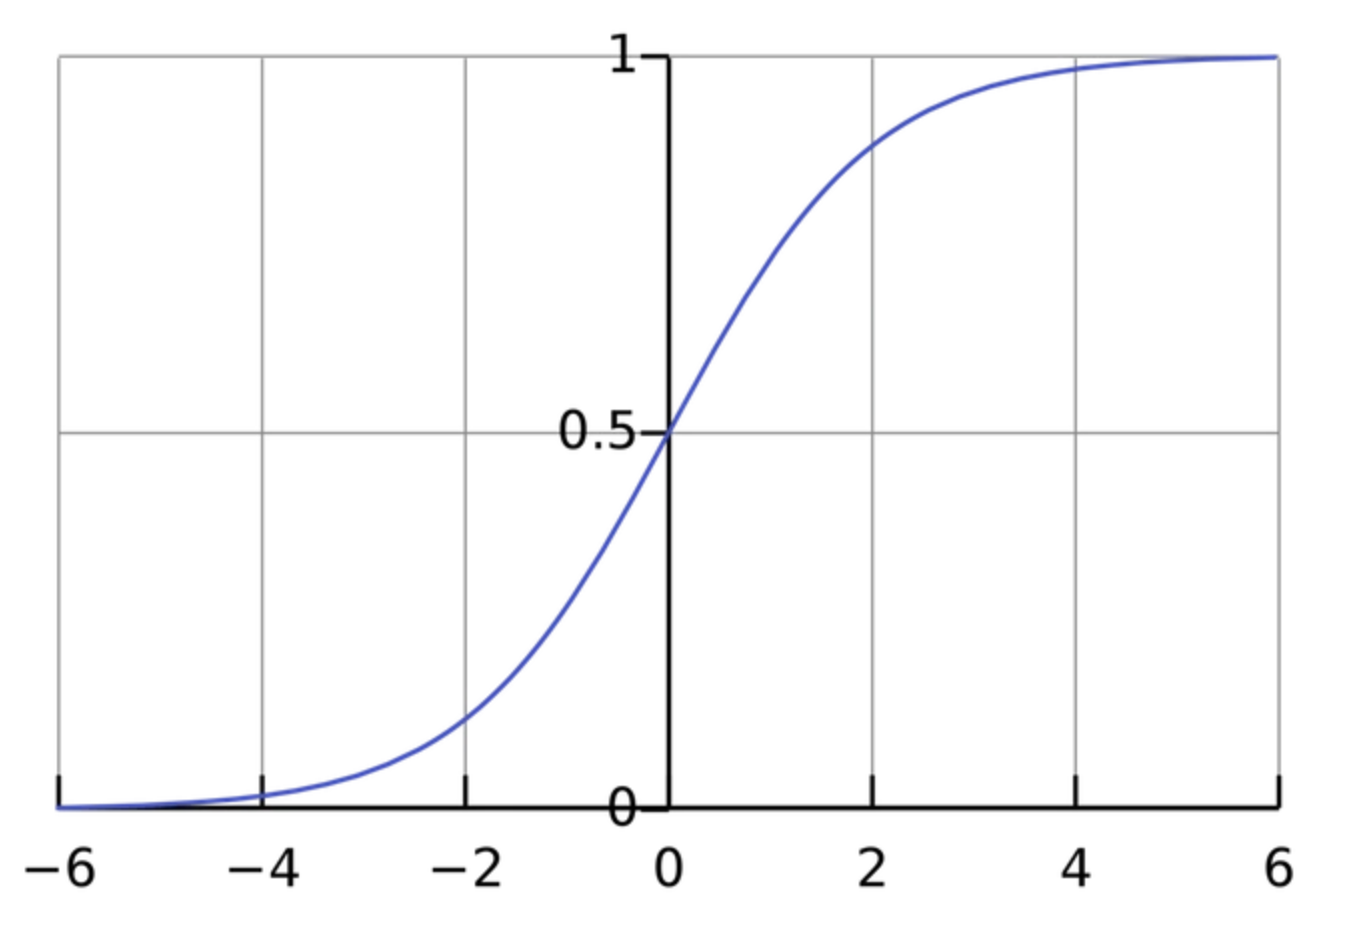

In [2]:
import numpy as np

def sigmoid(x):
  # Наша функция активации: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def feedforward(self, inputs):
    # Умножаем входы на веса, прибавляем порог, затем используем функцию активации
    total = np.dot(self.weights, inputs) + self.bias
    return sigmoid(total)

weights = np.array([0, 1]) # w1 = 0, w2 = 1
bias = 4                   # b = 4
n = Neuron(weights, bias)

x = np.array([2, 3])       # x1 = 2, x2 = 3
print(n.feedforward(x))    # 0.9990889488055994

0.9990889488055994


In [5]:
# task1.1. Реализовать код так, чтобы он всегда возвращать больше 0.95
weights = np.array([0, 0])
bias = 5
n = Neuron(weights, bias)
x = np.array([-10000, -10000])
print(n.feedforward(x)) #результат 0.9933071490757153

0.9933071490757153


In [30]:
# task1.2.Реализовать код так, чтобы он всегда возвращал не больше 0.1
weights = np.array([0, 0])
bias = -5
n = Neuron(weights, bias)

x = np.array([-1000, -1000])
print(n.feedforward(x)) 
#результат 0.0066928509242848554


0.0066928509242848554


In [9]:
# task1.1. Реализовать код так, чтобы он всегда возвращать больше 0.95
weights = np.array([0, 0])
bias = -10
n = Neuron(weights, bias)
x = np.array([-10000, -10000])
print(n.feedforward(x))

# task1.2.Реализовать код так, чтобы он всегда возвращал не больше 0.1
weights = np.array([0, 0])
bias = -10
n = Neuron(weights, bias)

x = np.array([-10000, -10000])
print(n.feedforward(x))



4.5397868702434395e-05
4.5397868702434395e-05


#1.2. Комбинация нейронов

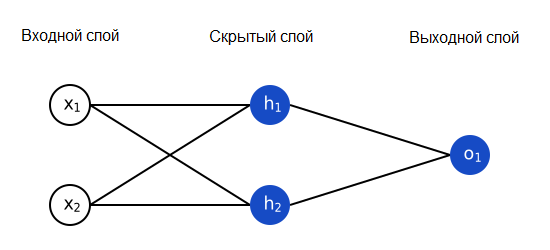

У этой сети два входа, скрытый слой с двумя нейронами (h1 и h2) и выходной слой с одним нейроном (o1). Обратите внимание, что входы для o1 – это выходы из h1 и h2. Именно это создает из нейронов сеть.

In [31]:
import numpy as np

# ... вставьте сюда код из предыдущего раздела
class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def feedforward(self, inputs):
    # Умножаем входы на веса, прибавляем порог, затем используем функцию активации
    total = np.dot(self.weights, inputs) + self.bias
    return sigmoid(total)

class OurNeuralNetwork:
  '''
  Нейронная сеть с:
    - 2 входами
    - скрытым слоем с 2 нейронами (h1, h2)
    - выходным слоем с 1 нейроном (o1)
  Все нейроны имеют одинаковые веса и пороги:
    - w = [0, 1]
    - b = 0
  '''
  def __init__(self):
    weights = np.array([0, 1])
    bias = 0

    # Используем класс Neuron из предыдущего раздела
    self.h1 = Neuron(weights, bias)
    self.h2 = Neuron(weights, bias)
    self.o1 = Neuron(weights, bias)

  def feedforward(self, x):
    out_h1 = self.h1.feedforward(x)
    out_h2 = self.h2.feedforward(x)

    # Входы для o1 - это выходы h1 и h2
    out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))

    return out_o1

network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x)) # 0.7216325609518421

0.7216325609518421


In [65]:
# task1.3. Реализовать код так, чтобы было 3 слоя

class OurNeuralNetwork:
  def __init__(self):
    weights = np.array([0, 1])
    bias = 0

    # Используем класс Neuron из предыдущего раздела
    self.h1 = Neuron(weights, bias)
    self.h2 = Neuron(weights, bias)
    self.h11 = Neuron(weights, bias)
    self.h21 = Neuron(weights, bias)
    self.o1 = Neuron(weights, bias)


  def feedforward(self, x):
    out_h1 = self.h1.feedforward(x)
    out_h2 = self.h2.feedforward(x)

    # Входы для h11 и h21 - это выходы h1 и h2
    out_h11 = self.h11.feedforward(np.array([out_h1, out_h2]))
    out_h21 = self.h21.feedforward(np.array([out_h1, out_h2]))

    # Входы для o1 - это выходы h11 и h21
    out_o1 = self.o1.feedforward(np.array([out_h11, out_h21]))
    return out_o1

# task1.4. Реализовать код так, чтобы всегда был вывод больше 0.95

class OurNeuralNetwork:
  def __init__(self):
    weights = np.array([0, 1])
    bias = 0

    # Используем класс Neuron из предыдущего раздела
    self.h1 = Neuron(weights, bias)
    self.h2 = Neuron(weights, bias)
    self.o1 = Neuron(weights, bias)

  def feedforward(self, x):
    out_h1 = self.h1.feedforward(x)
    out_h2 = self.h2.feedforward(x)

    # Входы для o1 - это выходы h1 и h2
    out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
    return out_o1



array([[0.43716512, 0.63930387, 0.52856373, 0.50501235],
       [0.19871665, 0.58366521, 0.49223898, 0.61321117],
       [0.56679511, 0.67117476, 0.37449024, 0.41037013],
       [0.29465699, 0.61751099, 0.341093  , 0.51957621]])

In [34]:
# task1.4. Реализовать код так, чтобы всегда был вывод больше 0.95

class OurNeuralNetwork:
  def __init__(self):
    weights = np.array([0, 0])
    bias = 4

    # Используем класс Neuron из предыдущего раздела
    self.h1 = Neuron(weights, bias)
    self.h2 = Neuron(weights, bias)
    self.o1 = Neuron(weights, bias)

  def feedforward(self, x):
    out_h1 = self.h1.feedforward(x)
    out_h2 = self.h2.feedforward(x)

    # Входы для o1 - это выходы h1 и h2
    out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
    return out_o1

network = OurNeuralNetwork()
x = np.array([1000, 1000])
print(network.feedforward(x)) 
# результат 0.9820137900379085


0.9820137900379085


In [35]:
# task1.3. Реализовать код так, чтобы было 3 слоя

class OurNeuralNetwork:
  def __init__(self):
    weights = np.array([0, 1])
    bias = 0

    # Используем класс Neuron из предыдущего раздела
    self.h1 = Neuron(weights, bias)
    self.h2 = Neuron(weights, bias)
    self.h11 = Neuron(weights, bias)
    self.h21 = Neuron(weights, bias)
    self.o1 = Neuron(weights, bias)


  def feedforward(self, x):
    out_h1 = self.h1.feedforward(x)
    out_h2 = self.h2.feedforward(x)

    # Входы для h11 и h21 - это выходы h1 и h2
    out_h11 = self.h11.feedforward(np.array([out_h1, out_h2]))
    out_h21 = self.h21.feedforward(np.array([out_h1, out_h2]))

    # Входы для o1 - это выходы h11 и h21
    out_o1 = self.o1.feedforward(np.array([out_h11, out_h21]))
    return out_o1

network = OurNeuralNetwork()
x = np.array([1000, 1000])
print(network.feedforward(x)) 
# результат 0.6750375273768237

0.6750375273768237


#1.3 Функции активации

Сигмоида

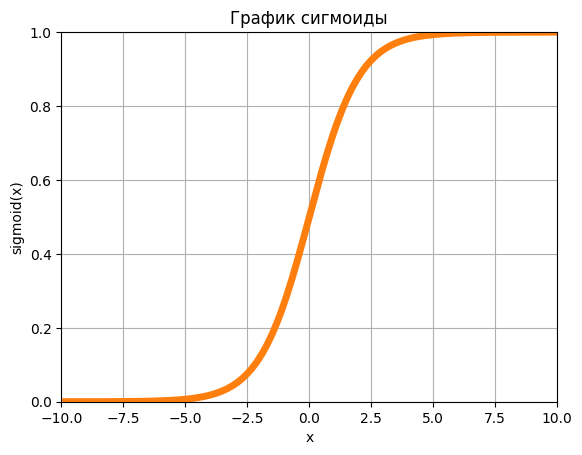

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем параметры сигмоиды
x = np.linspace(-100, 100, 1000)
y = 1 / (1 + np.exp(-x))

# Строим график
plt.plot(x, y)

# Настраиваем оси координат и заголовок
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('График сигмоиды')

# Настраиваем значения осей координат
plt.xlim(-10, 10)
plt.ylim(0, 1)

# Строим график, настраиваем ширину линии и добавляем сетку
plt.plot(x, y, linewidth=5)
plt.grid(True)

# Отображаем график
plt.show()

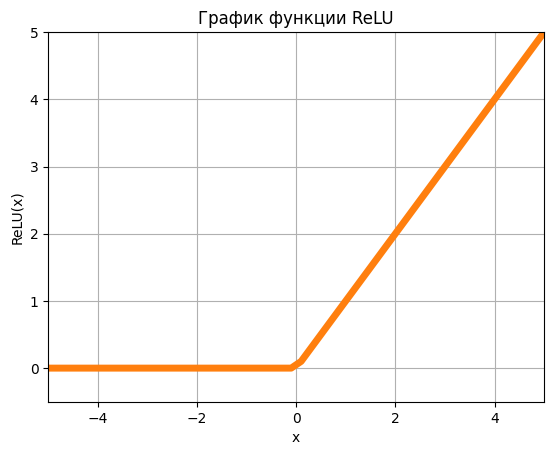

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем параметры сигмоиды
x = np.linspace(-100, 100, 1000)
y = np.maximum(x, 0)

# Строим график
plt.plot(x, y)

# Настраиваем оси координат и заголовок
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.title('График функции ReLU')

# Настраиваем значения осей координат
plt.xlim(-5, 5)
plt.ylim(-0.5, 5)

# Строим график, настраиваем ширину линии и добавляем сетку
plt.plot(x, y, linewidth=5)
plt.grid(True)

# Отображаем график
plt.show()

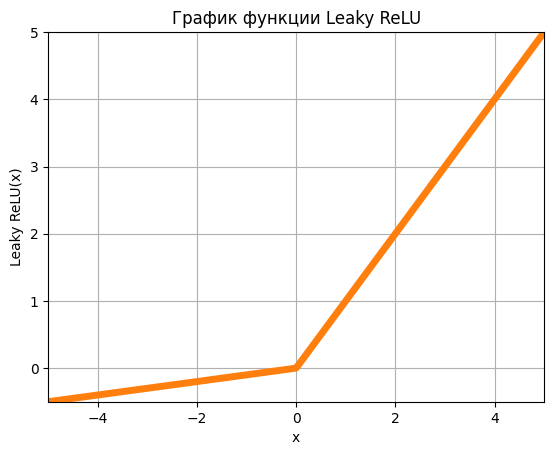

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем параметры функции Leaky ReLU
x = np.linspace(-10, 10, 1000)
alpha = 0.1
y = np.where(x > 0, x, alpha*x)

# Строим график
plt.plot(x, y)

# Настраиваем оси координат и заголовок
plt.xlabel('x')
plt.ylabel('Leaky ReLU(x)')
plt.title('График функции Leaky ReLU')

# Настраиваем значения осей координат
plt.xlim(-5, 5)
plt.ylim(-0.5, 5)

# Строим график, настраиваем ширину линии и добавляем сетку
plt.plot(x, y, linewidth=5)
plt.grid(True)

# Отображаем график
plt.show()

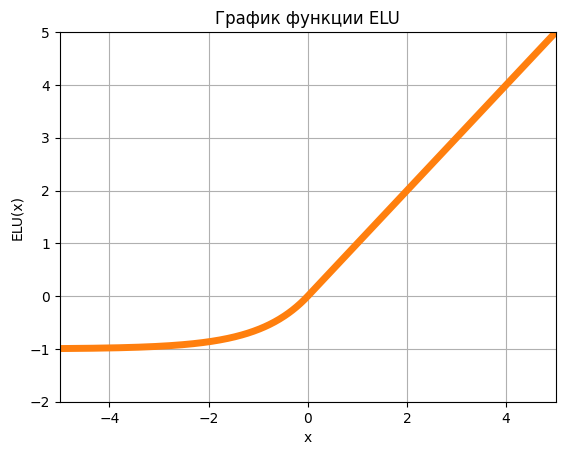

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем параметры функции ELU
x = np.linspace(-10, 10, 1000)
alpha = 1.0
y = np.where(x > 0, x, alpha * (np.exp(x) - 1))

# Строим график
plt.plot(x, y)

# Настраиваем оси координат и заголовок
plt.xlabel('x')
plt.ylabel('ELU(x)')
plt.title('График функции ELU')

# Настраиваем значения осей координат
plt.xlim(-5, 5)
plt.ylim(-2, 5)

# Строим график, настраиваем ширину линии и добавляем сетку
plt.plot(x, y, linewidth=5)
plt.grid(True)

# Отображаем график
plt.show()

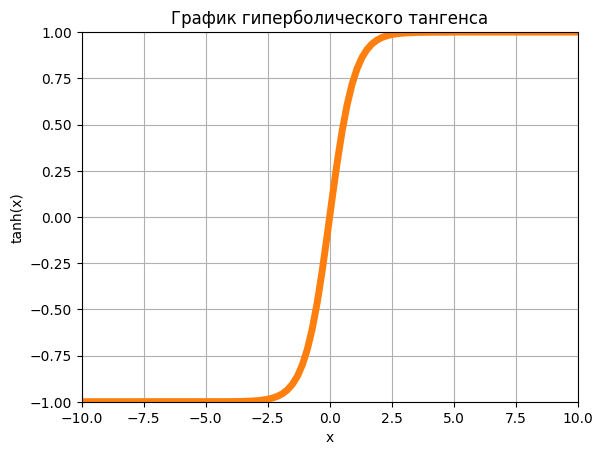

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем параметры сигмоиды
x = np.linspace(-100, 100, 1000)
y = np.tanh(x)

# Строим график
plt.plot(x, y)

# Настраиваем оси координат и заголовок
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.title('График гиперболического тангенса')

# Настраиваем значения осей координат
plt.xlim(-10, 10)
plt.ylim(-1, 1)

# Строим график, настраиваем ширину линии и добавляем сетку
plt.plot(x, y, linewidth=5)
plt.grid(True)

# Отображаем график
plt.show()

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(z):
    # Преобразуем вектор в массив, чтобы избежать ошибок типа "integer division or modulo by zero"
    z = np.array(z)
    # Вычисляем экспоненты каждого элемента вектора
    exp_z = np.exp(z)
    # Вычисляем сумму экспонент всех элементов вектора
    sum_exp_z = np.sum(exp_z)
    # Вычисляем вероятности для каждого элемента вектора
    softmax_z = exp_z / sum_exp_z
    return softmax_z

# Задаем входной вектор
z = [1, 2, 3, 4, 1, 2, 3]
# Вычисляем значения Softmax
softmax_z = softmax(z)

# Выводим значения на экран
print("Softmax(z) =", softmax_z)

# # Строим график вероятностного распределения
# plt.bar(range(len(z)), softmax_z)
# plt.title("Softmax Distribution")
# plt.xlabel("Class")
# plt.ylabel("Probability")
# plt.show()

Softmax(z) = [0.02364054 0.06426166 0.1746813  0.474833   0.02364054 0.06426166
 0.1746813 ]


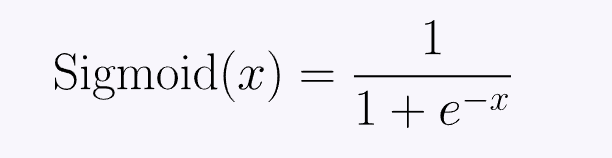

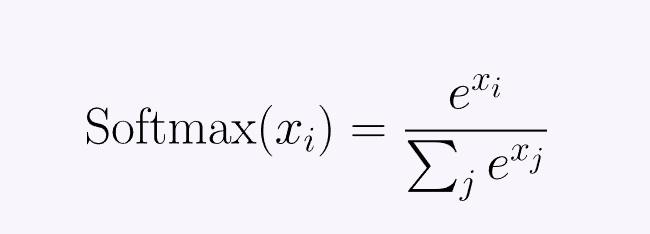

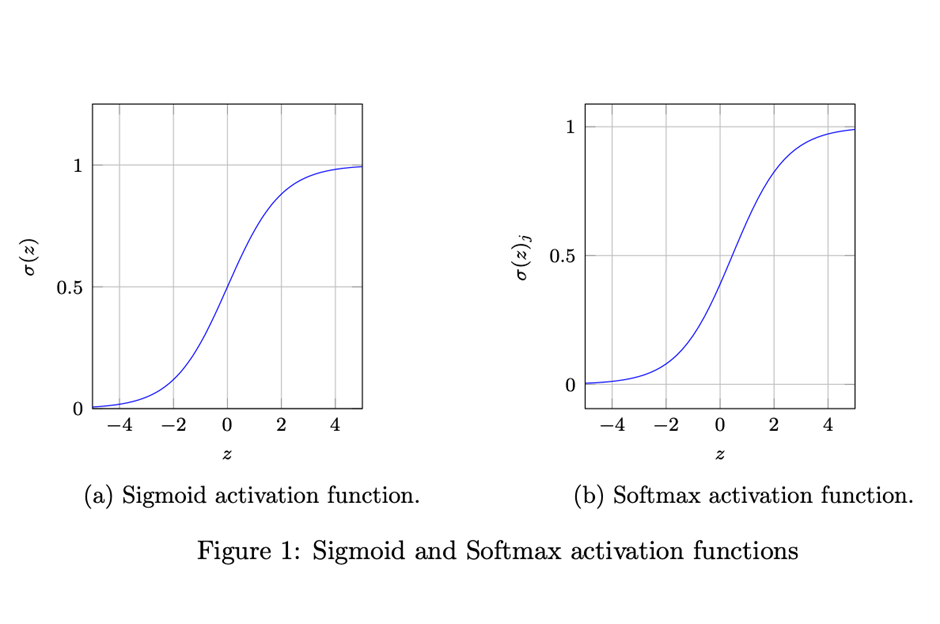

In [78]:
# task1.5. Реализовать и выбрать оптимальную функцию активации для нейронной сети из пункта 1.2
# task1.6. Попробуйте придумать свою функцию активации и реализовать в нейронной сети из пункта 1.2


In [46]:
import numpy as np

# ... вставьте сюда код из предыдущего раздела
class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def feedforward(self, inputs):
    # Умножаем входы на веса, прибавляем порог, затем используем функцию активации
    total = np.dot(self.weights, inputs) + self.bias
    #return sigmoid(total)
    #return softmax(total)
    #return np.tanh(total)
    #return np.maximum(total, 0)
    alpha = 1.0

    return np.where(total > 0, total, alpha * (np.exp(total) - 1))
    

class OurNeuralNetwork:
  '''
  Нейронная сеть с:
    - 2 входами
    - скрытым слоем с 2 нейронами (h1, h2)
    - выходным слоем с 1 нейроном (o1)
  Все нейроны имеют одинаковые веса и пороги:
    - w = [0, 1]
    - b = 0
  '''
  def __init__(self):
    weights = np.array([0, 1])
    bias = 0

    # Используем класс Neuron из предыдущего раздела
    self.h1 = Neuron(weights, bias)
    self.h2 = Neuron(weights, bias)
    self.o1 = Neuron(weights, bias)

  def feedforward(self, x):
    out_h1 = self.h1.feedforward(x)
    out_h2 = self.h2.feedforward(x)

    # Входы для o1 - это выходы h1 и h2
    out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))

    return out_o1

network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x)) 
# sigmoid: 0.7216325609518421
# softmax: 1.0
# tanh: 0.7595094447988621
# Relu: 3
# ELU: 3

3.0


#1.4. Функция потерь

Прежде чем обучать нашу нейронную сеть, нам нужно как-то измерить, насколько "хорошо" она работает, чтобы она смогла работать "лучше". Это измерение и есть потери (loss).

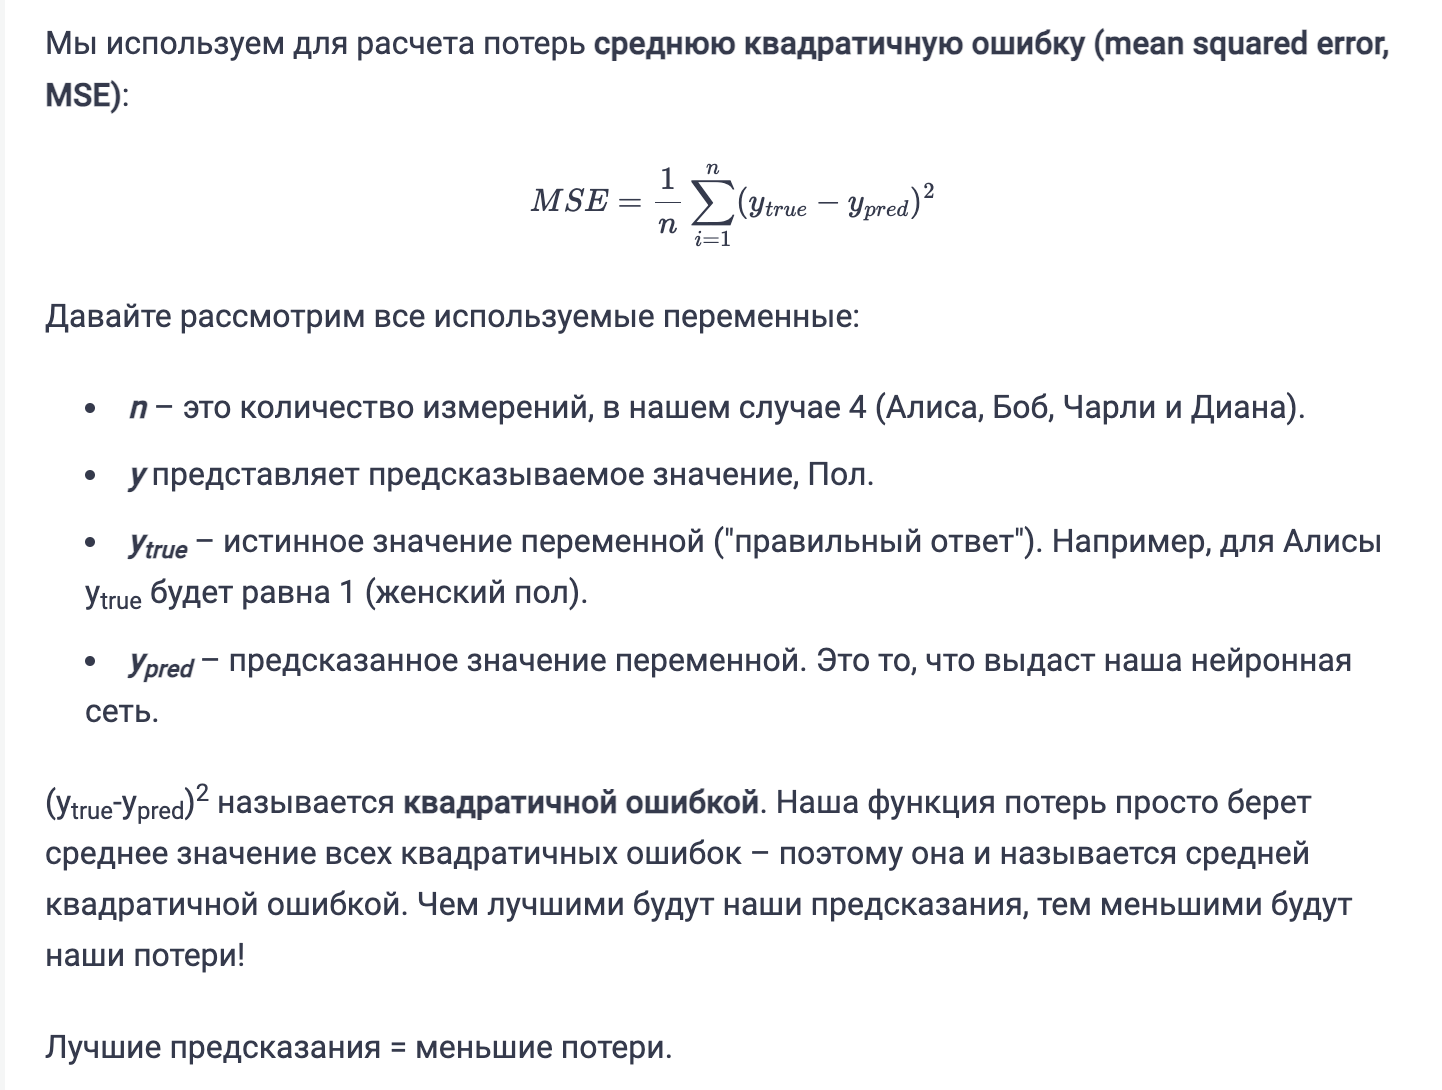

In [4]:
import numpy as np
def mse_loss(y_true, y_pred):
  # y_true и y_pred - массивы numpy одинаковой длины.
  return ((y_true - y_pred) ** 2).mean()

y_true = np.array([1, 0, 0, 1, 2, 4])
y_pred = np.array([0, 0, 0, 0, 4, 6])

print(mse_loss(y_true, y_pred)) # 1.6666666666666667

1.6666666666666667


In [79]:
# task1.7 Реализовть MAE (возьмите код выше за базу)

In [5]:
def mae_loss(y_true, y_pred):
  # y_true и y_pred - массивы numpy одинаковой длины.
  return np.absolute(y_true - y_pred).mean()

y_true = np.array([1, 0, 0, 1, 2, 4])
y_pred = np.array([0, 0, 0, 0, 4, 6])

print(mae_loss(y_true, y_pred)) # 1.0

1.0


#1.5. Обучение

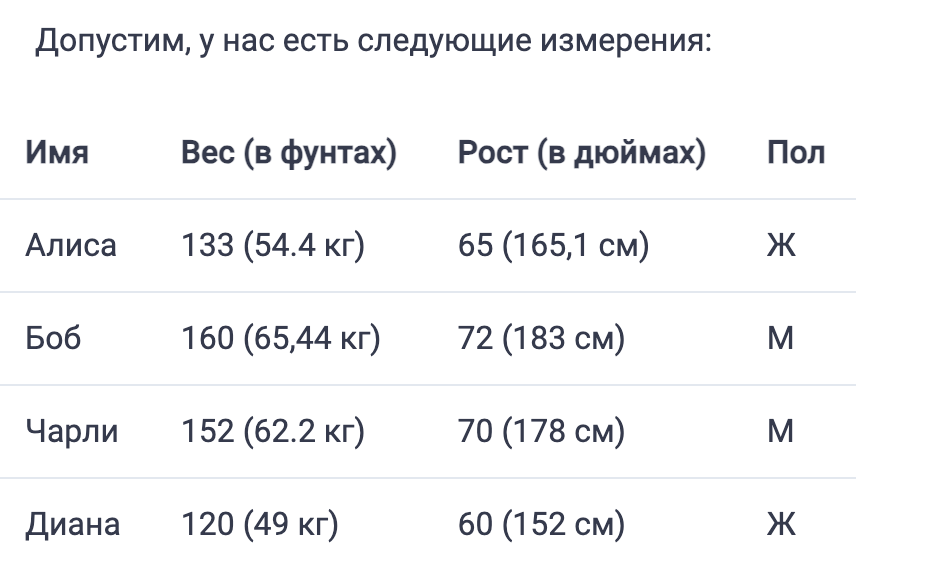

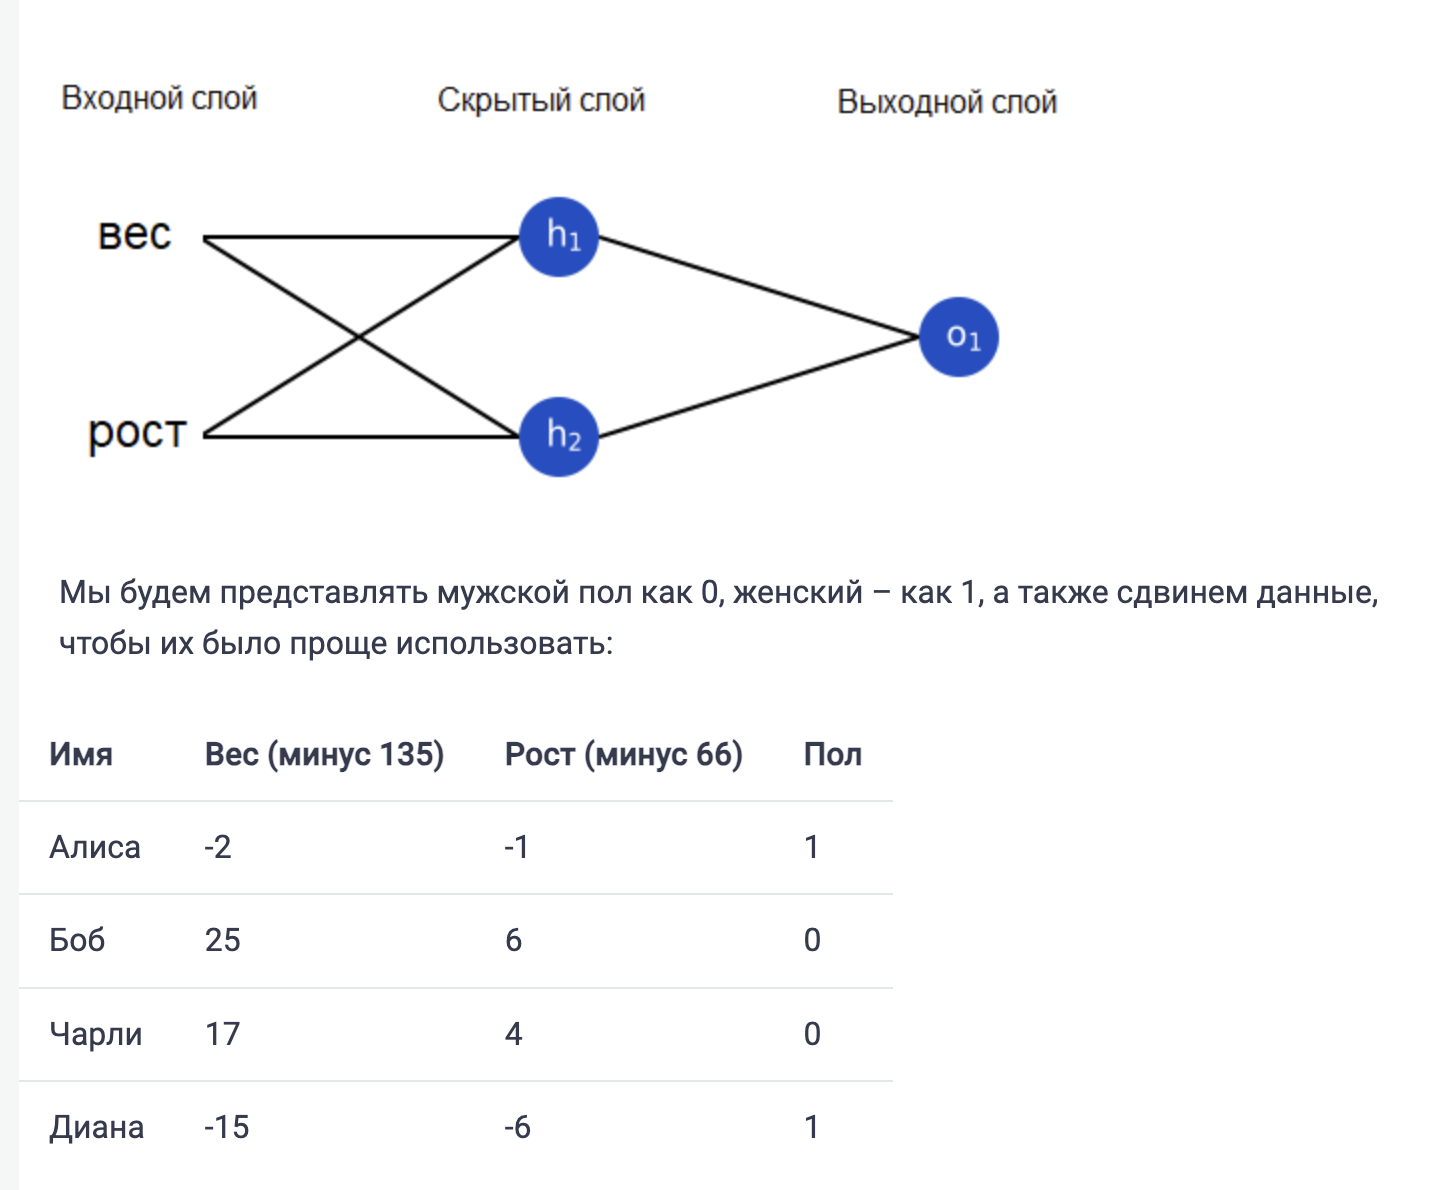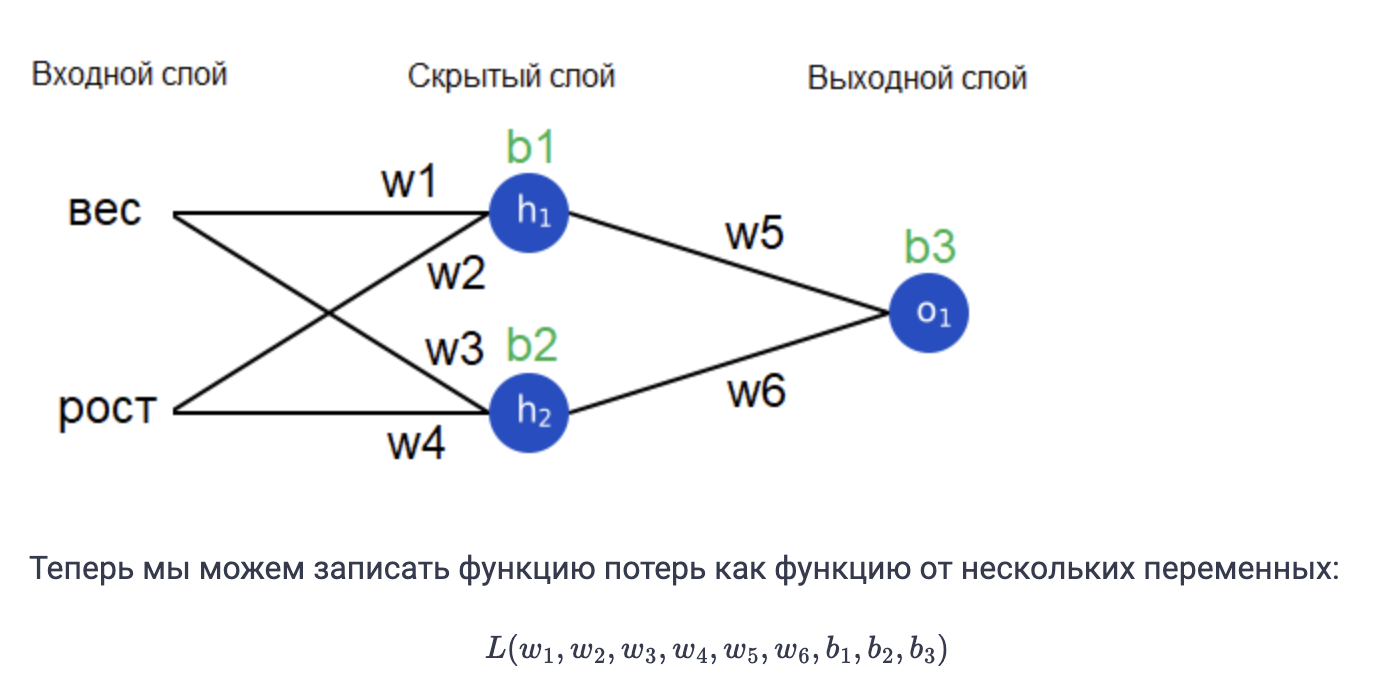

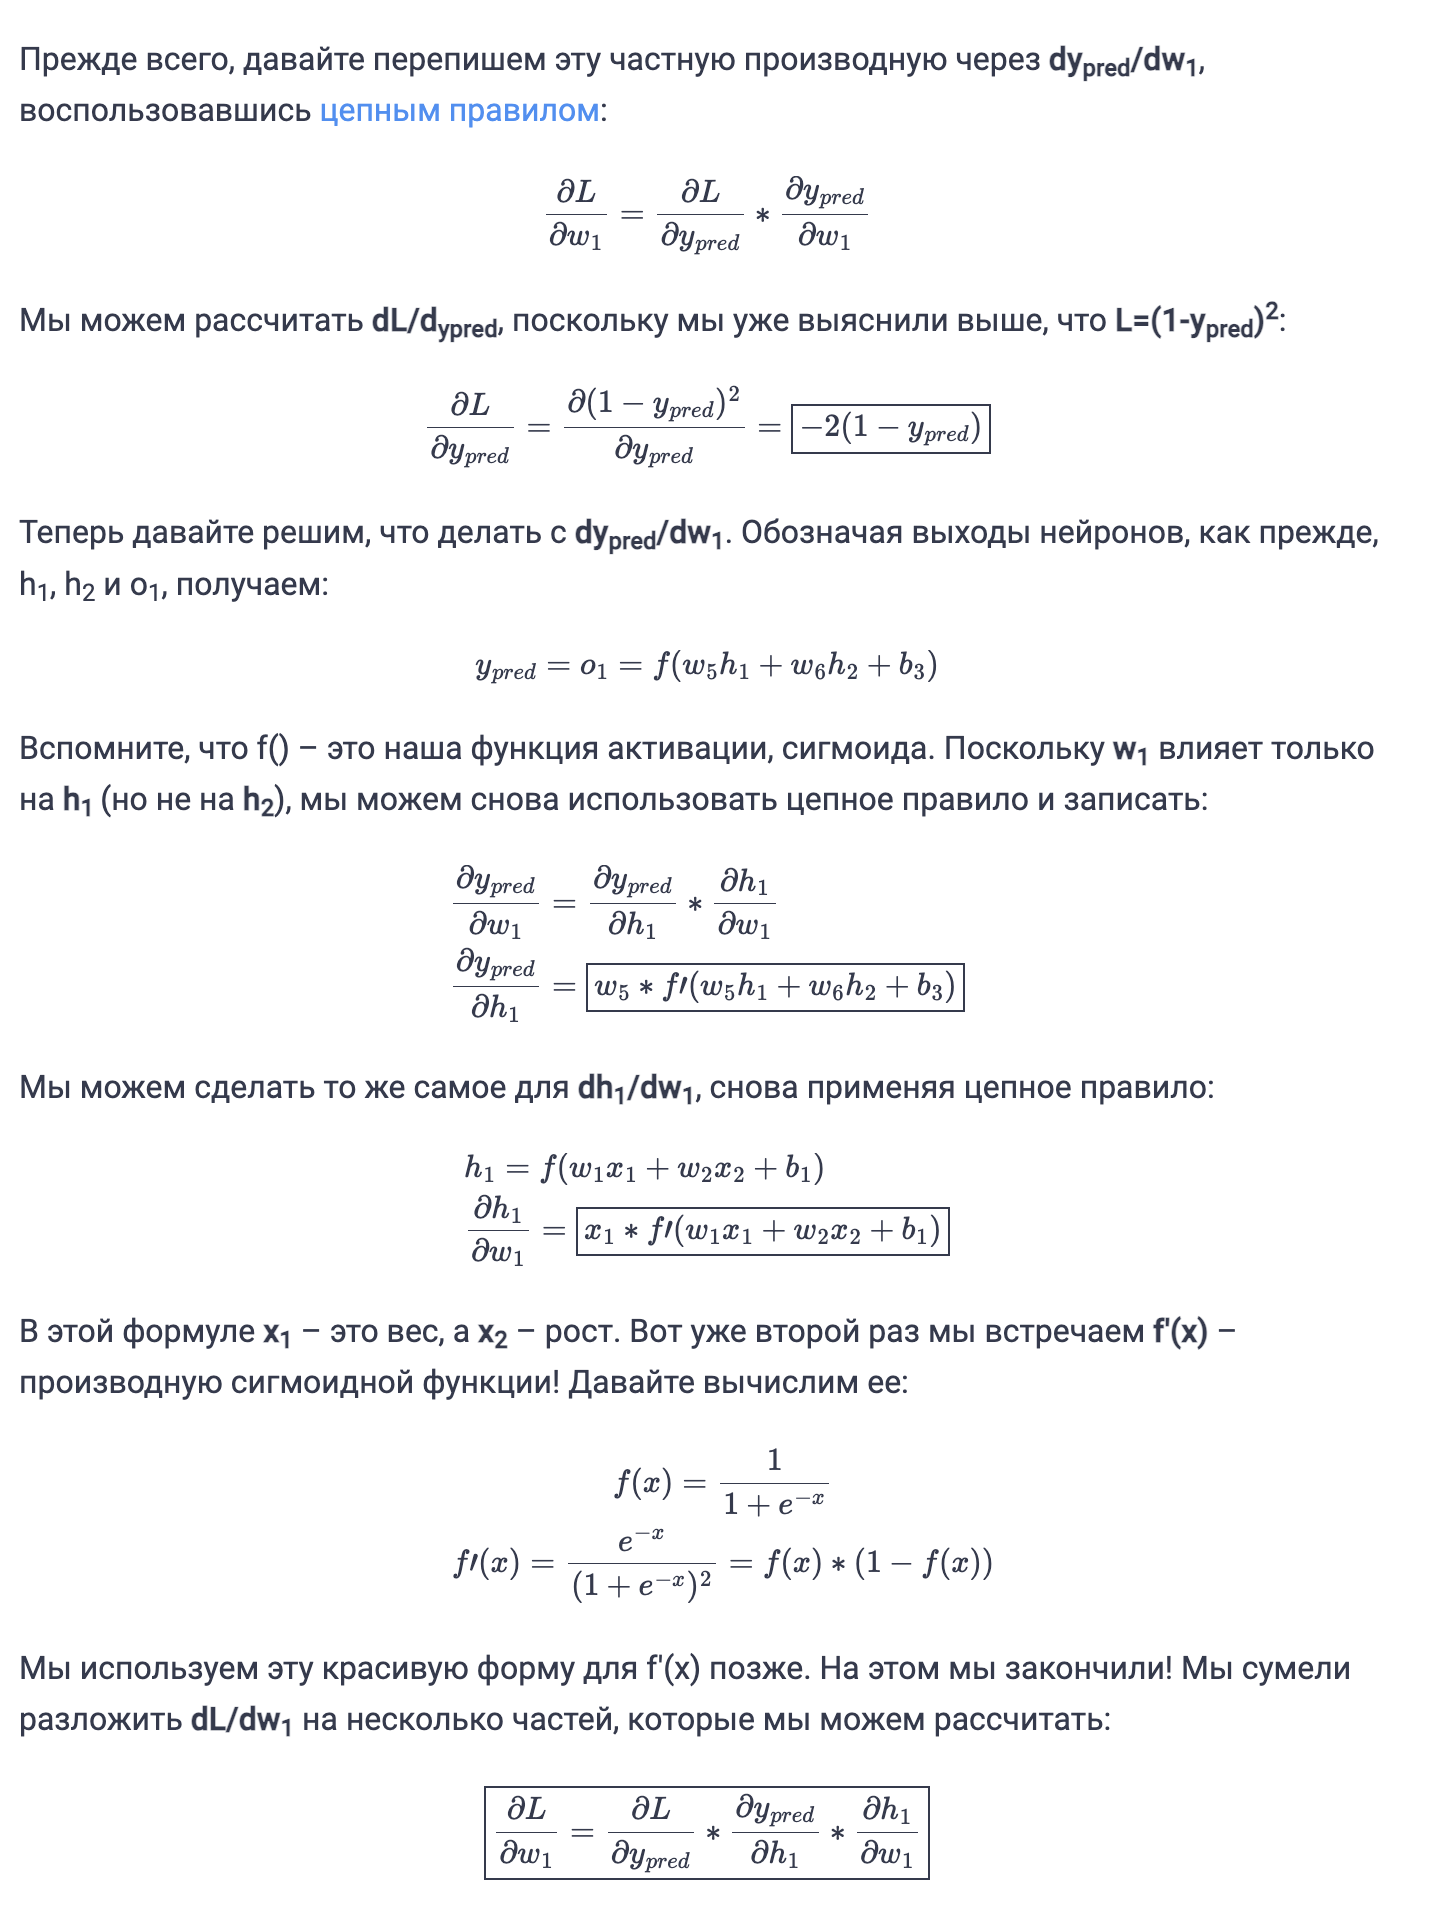

In [6]:
import numpy as np

def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def mae_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return (abs(y_true - y_pred)).mean()

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)

  *** DISCLAIMER ***:
  The code below is intended to be simple and educational, NOT optimal.
  Real neural net code looks nothing like this. DO NOT use this code.
  Instead, read/run it to understand how this specific network works.
  '''
  def __init__(self):
    # Weights
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Biases
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.1
    epochs = 1000 # number of times to loop through the entire dataset

    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = sigmoid(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = sigmoid(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = sigmoid(sum_o1)
        y_pred = o1

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neuron o1
        d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
        d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
        d_ypred_d_b3 = deriv_sigmoid(sum_o1)

        d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
        d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

        # Neuron h1
        d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
        d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
        d_h1_d_b1 = deriv_sigmoid(sum_h1)

        # Neuron h2
        d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
        d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
        d_h2_d_b2 = deriv_sigmoid(sum_h2)

        # --- Update weights and biases
        # Neuron h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Neuron h2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Neuron o1
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # --- Calculate total loss at the end of each epoch
      if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        print("Epoch %d loss: %.3f" % (epoch, loss))

# Define dataset
data = np.array([
  [-2, -1],  # Alice
  [25, 6],   # Bob
  [17, 4],   # Charlie
  [-15, -6], # Diana
])
all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_trues)

# Make some predictions
emily = np.array([-7, -3]) # 128 pounds, 63 inches
frank = np.array([20, 2])  # 155 pounds, 68 inches
print("Emily: %.3f" % network.feedforward(emily)) # 0.951 - F
print("Frank: %.3f" % network.feedforward(frank)) # 0.039 - M

Epoch 0 loss: 0.433
Epoch 10 loss: 0.173
Epoch 20 loss: 0.136
Epoch 30 loss: 0.109
Epoch 40 loss: 0.089
Epoch 50 loss: 0.074
Epoch 60 loss: 0.063
Epoch 70 loss: 0.054
Epoch 80 loss: 0.047
Epoch 90 loss: 0.041
Epoch 100 loss: 0.037
Epoch 110 loss: 0.033
Epoch 120 loss: 0.030
Epoch 130 loss: 0.027
Epoch 140 loss: 0.025
Epoch 150 loss: 0.023
Epoch 160 loss: 0.021
Epoch 170 loss: 0.020
Epoch 180 loss: 0.018
Epoch 190 loss: 0.017
Epoch 200 loss: 0.016
Epoch 210 loss: 0.015
Epoch 220 loss: 0.014
Epoch 230 loss: 0.014
Epoch 240 loss: 0.013
Epoch 250 loss: 0.012
Epoch 260 loss: 0.012
Epoch 270 loss: 0.011
Epoch 280 loss: 0.011
Epoch 290 loss: 0.010
Epoch 300 loss: 0.010
Epoch 310 loss: 0.009
Epoch 320 loss: 0.009
Epoch 330 loss: 0.009
Epoch 340 loss: 0.008
Epoch 350 loss: 0.008
Epoch 360 loss: 0.008
Epoch 370 loss: 0.008
Epoch 380 loss: 0.007
Epoch 390 loss: 0.007
Epoch 400 loss: 0.007
Epoch 410 loss: 0.007
Epoch 420 loss: 0.007
Epoch 430 loss: 0.006
Epoch 440 loss: 0.006
Epoch 450 loss: 0.006

In [86]:
#task1.8: реализовать с функцией потерь MAE код выше
#task1.9: реализовать с функцией активации RELU код выше

In [7]:
import numpy as np

def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def mae_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return (abs(y_true - y_pred)).mean()

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)

  *** DISCLAIMER ***:
  The code below is intended to be simple and educational, NOT optimal.
  Real neural net code looks nothing like this. DO NOT use this code.
  Instead, read/run it to understand how this specific network works.
  '''
  def __init__(self):
    # Weights
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Biases
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.1
    epochs = 1000 # number of times to loop through the entire dataset

    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = sigmoid(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = sigmoid(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = sigmoid(sum_o1)
        y_pred = o1

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neuron o1
        d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
        d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
        d_ypred_d_b3 = deriv_sigmoid(sum_o1)

        d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
        d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

        # Neuron h1
        d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
        d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
        d_h1_d_b1 = deriv_sigmoid(sum_h1)

        # Neuron h2
        d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
        d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
        d_h2_d_b2 = deriv_sigmoid(sum_h2)

        # --- Update weights and biases
        # Neuron h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Neuron h2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Neuron o1
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # --- Calculate total loss at the end of each epoch
      if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        print("Epoch %d loss: %.3f" % (epoch, loss))

# Define dataset
data = np.array([
  [-2, -1],  # Alice
  [25, 6],   # Bob
  [17, 4],   # Charlie
  [-15, -6], # Diana
])
all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_trues)

# Make some predictions
emily = np.array([-7, -3]) # 128 pounds, 63 inches
frank = np.array([20, 2])  # 155 pounds, 68 inches
print("Emily: %.3f" % network.feedforward(emily)) # 0.951 - F
print("Frank: %.3f" % network.feedforward(frank)) # 0.039 - M

Epoch 0 loss: 0.109
Epoch 10 loss: 0.087
Epoch 20 loss: 0.071
Epoch 30 loss: 0.059
Epoch 40 loss: 0.050
Epoch 50 loss: 0.043
Epoch 60 loss: 0.038
Epoch 70 loss: 0.033
Epoch 80 loss: 0.030
Epoch 90 loss: 0.027
Epoch 100 loss: 0.025
Epoch 110 loss: 0.023
Epoch 120 loss: 0.021
Epoch 130 loss: 0.019
Epoch 140 loss: 0.018
Epoch 150 loss: 0.017
Epoch 160 loss: 0.016
Epoch 170 loss: 0.015
Epoch 180 loss: 0.014
Epoch 190 loss: 0.013
Epoch 200 loss: 0.012
Epoch 210 loss: 0.012
Epoch 220 loss: 0.011
Epoch 230 loss: 0.011
Epoch 240 loss: 0.010
Epoch 250 loss: 0.010
Epoch 260 loss: 0.009
Epoch 270 loss: 0.009
Epoch 280 loss: 0.009
Epoch 290 loss: 0.008
Epoch 300 loss: 0.008
Epoch 310 loss: 0.008
Epoch 320 loss: 0.008
Epoch 330 loss: 0.007
Epoch 340 loss: 0.007
Epoch 350 loss: 0.007
Epoch 360 loss: 0.007
Epoch 370 loss: 0.007
Epoch 380 loss: 0.006
Epoch 390 loss: 0.006
Epoch 400 loss: 0.006
Epoch 410 loss: 0.006
Epoch 420 loss: 0.006
Epoch 430 loss: 0.006
Epoch 440 loss: 0.005
Epoch 450 loss: 0.005

In [10]:
def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return np.maximum(x, 0)

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  if fx <= 0:
    der_f = 0
  else:
    der_f = 1
  return der_f

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred)**2).mean()

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)

  *** DISCLAIMER ***:
  The code below is intended to be simple and educational, NOT optimal.
  Real neural net code looks nothing like this. DO NOT use this code.
  Instead, read/run it to understand how this specific network works.
  '''
  def __init__(self):
    # Weights
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Biases
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.1
    epochs = 1000 # number of times to loop through the entire dataset

    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = sigmoid(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = sigmoid(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = sigmoid(sum_o1)
        y_pred = o1

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neuron o1
        d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
        d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
        d_ypred_d_b3 = deriv_sigmoid(sum_o1)

        d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
        d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

        # Neuron h1
        d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
        d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
        d_h1_d_b1 = deriv_sigmoid(sum_h1)

        # Neuron h2
        d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
        d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
        d_h2_d_b2 = deriv_sigmoid(sum_h2)

        # --- Update weights and biases
        # Neuron h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Neuron h2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Neuron o1
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # --- Calculate total loss at the end of each epoch
      if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        print("Epoch %d loss: %.3f" % (epoch, loss))

# Define dataset
data = np.array([
  [-2, -1],  # Alice
  [25, 6],   # Bob
  [17, 4],   # Charlie
  [-15, -6], # Diana
])
all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_trues)

# Make some predictions
emily = np.array([-7, -3]) # 128 pounds, 63 inches
frank = np.array([20, 2])  # 155 pounds, 68 inches
print("Emily: %.3f" % network.feedforward(emily)) 
print("Frank: %.3f" % network.feedforward(frank)) 

Epoch 0 loss: 0.500
Epoch 10 loss: 0.500
Epoch 20 loss: 0.500
Epoch 30 loss: 0.500
Epoch 40 loss: 0.500
Epoch 50 loss: 0.500
Epoch 60 loss: 0.500
Epoch 70 loss: 0.500
Epoch 80 loss: 0.500
Epoch 90 loss: 0.500
Epoch 100 loss: 0.500
Epoch 110 loss: 0.500
Epoch 120 loss: 0.500
Epoch 130 loss: 0.500
Epoch 140 loss: 0.500
Epoch 150 loss: 0.500
Epoch 160 loss: 0.500
Epoch 170 loss: 0.500
Epoch 180 loss: 0.500
Epoch 190 loss: 0.500
Epoch 200 loss: 0.500
Epoch 210 loss: 0.500
Epoch 220 loss: 0.500
Epoch 230 loss: 0.500
Epoch 240 loss: 0.500
Epoch 250 loss: 0.500
Epoch 260 loss: 0.500
Epoch 270 loss: 0.500
Epoch 280 loss: 0.500
Epoch 290 loss: 0.500
Epoch 300 loss: 0.500
Epoch 310 loss: 0.500
Epoch 320 loss: 0.500
Epoch 330 loss: 0.500
Epoch 340 loss: 0.500
Epoch 350 loss: 0.500
Epoch 360 loss: 0.500
Epoch 370 loss: 0.500
Epoch 380 loss: 0.500
Epoch 390 loss: 0.500
Epoch 400 loss: 0.500
Epoch 410 loss: 0.500
Epoch 420 loss: 0.500
Epoch 430 loss: 0.500
Epoch 440 loss: 0.500
Epoch 450 loss: 0.500

#1.6. Решение уравнений

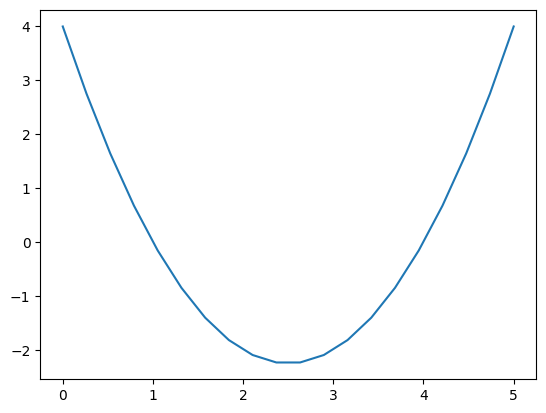

In [87]:
# y = x ** 2 - 5 * x + 4
# Создаем арифметическую последовательность plot_x1
plot_x1 = np.linspace(0, 5, 20)
# Рассчитываем plot_y1 согласно нашему уравнению
plot_y1 = (plot_x1 ** 2 - 5 * plot_x1 + 4)
# Возьмем соответствующее положение plot_x1 plot_y1 как координаты x, y точки, затем нарисуем кривую квадратного уравнения
plt.plot(plot_x1, plot_y1)
plt.show()

In [88]:
# Функция градиента
def dJ(x):
    return 2 * x - 5

 # Функция потерь
def J(x):
    return (x ** 2 - 5 * x + 4)

x = 0.0
 # Записываем точку каждого падения градиента
history_x=[x]
i_iter=0.1
 # Скорость обучения
learn_rate = 0.1
 # Выполнить градиентную итерацию
while i_iter < 1e4:
    i_iter += 0.1
    dj = dJ(x)
    last_x = x
    x =x - learn_rate * dj
    history_x.append(x)

         # Если итерация достигнута точно, расчет завершен
    if abs(J(x)-J(last_x))<0.0000000001 :
        break

history_y = J(np.array(history_x))
print(f'Координата x в минимуме параболы равна {round(x, 1)}')

Координата x в минимуме параболы равна 2.5


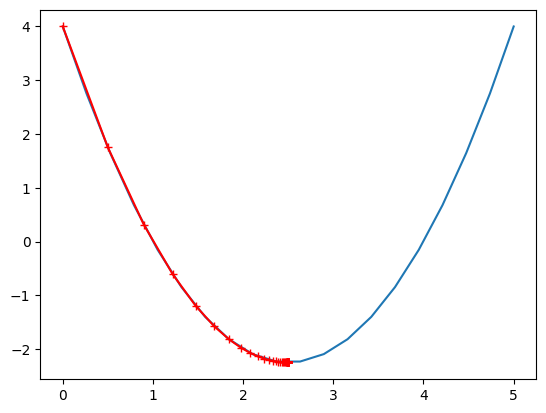

In [89]:
plt.plot(plot_x1, plot_y1)
plt.plot(history_x, history_y,color='r', marker='+')

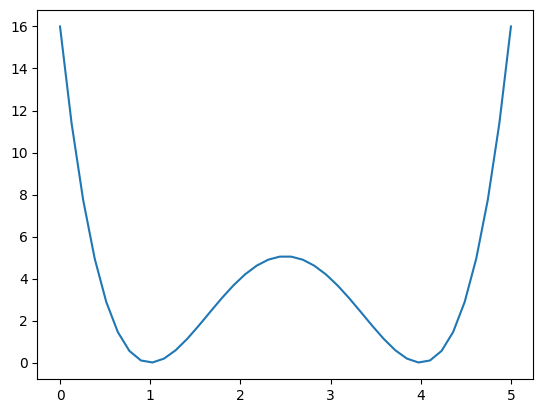

In [90]:
# Создаем арифметическую последовательность plot_x2
plot_x2 = np.linspace(0, 5, 40)
# Рассчитываем plot_y2 согласно нашему уравнению
plot_y2 = (plot_x2 ** 2 - 5 * plot_x2 + 4)**2
# Возьмем соответствующее положение plot_x2 plot_y2 как координаты x, y точки, затем нарисуем кривую уравнения
plt.plot(plot_x2, plot_y2)
plt.show()


In [91]:
# Функция градиента
def dJ(x):
    return 4 * x ** 3 - 30 * x ** 2 + 66 * x - 40

 # Функция потерь
def J(x):
    return (x ** 2 - 5 * x + 4)**2


x = 2.5

x1 = 2.5 - 0.1
x2 = 2.5 + 0.1
 # Записываем точку каждого падения градиента
history_x1=[x1]
history_x2=[x2]
i_iter=0.06
 # Скорость обучения
learn_rate = 0.1
 # Выполнить градиентную итерацию
while i_iter < 1e4:
    i_iter += 0.06
    dj1 = dJ(x1)
    dj2 = dJ(x2)
    last_x1 = x1
    last_x2 = x2
    x1 = x1 - learn_rate * dj1
    x2 = x2 - learn_rate * dj2
    history_x1.append(x1)
    history_x2.append(x2)

         # Если итерация достигнута точно, расчет завершен
    if abs(J(x1)-J(last_x1))<0.0000000001 :
        break
    if abs(J(x2)-J(last_x2))<0.0000000001 :
        break

history_y1 = J(np.array(history_x1))
history_y2 = J(np.array(history_x2))

print(f'Корни квадратного уровня: х1 = {round(x1, 1)}, х2 = {round(x2, 1)}')

Корни квадратного уровня: х1 = 1.0, х2 = 4.0


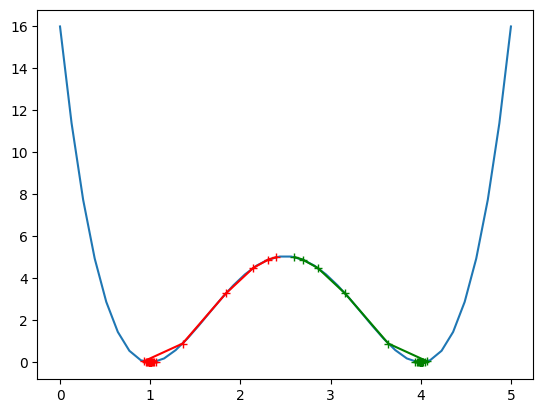

In [92]:
plt.plot(plot_x2,plot_y2)
plt.plot(history_x1,history_y1,color='r',marker='+')
plt.plot(history_x2,history_y2,color='g',marker='+')